In [60]:
import h5py
import pandas as pd
import numpy as np
import tensorflow as tf
from tqdm import tqdm_notebook as tqdm

In [61]:
import _pickle
y_vocab = _pickle.load(open('./data/y_vocab.py3.cPickle', 'rb'))
y_vocab['43>109>1576>-1']
print(len(y_vocab))

4215


In [62]:
y_vocab.items()

dict_items([('14>13>235>-1', 0), ('51>545>-1>-1', 1), ('28>47>1356>-1', 2), ('30>195>2378>-1', 3), ('56>503>3179>227', 4), ('54>551>3149>-1', 5), ('30>273>512>-1', 6), ('34>409>1340>-1', 7), ('2>66>685>-1', 13), ('25>435>1906>-1', 10), ('43>109>1576>-1', 11), ('40>100>951>-1', 14), ('35>68>1782>-1', 15), ('37>159>1155>-1', 17), ('13>293>3123>-1', 18), ('28>86>167>-1', 19), ('15>268>818>-1', 3517), ('34>439>2696>-1', 20), ('11>151>1478>-1', 21), ('44>175>2432>-1', 24), ('11>220>1617>-1', 23), ('23>246>-1>-1', 27), ('44>437>2441>-1', 28), ('12>234>420>50', 29), ('24>204>890>-1', 31), ('44>175>2136>-1', 33), ('51>240>2905>-1', 34), ('56>495>2600>227', 2084), ('41>249>2118>-1', 35), ('16>19>472>-1', 36), ('17>179>465>-1', 37), ('28>47>57>-1', 38), ('10>476>3148>-1', 39), ('23>411>1373>-1', 41), ('41>318>1490>269', 43), ('9>51>546>-1', 44), ('25>32>1655>181', 12), ('22>27>716>-1', 995), ('8>214>782>-1', 47), ('56>504>2645>227', 2780), ('1>336>2422>-1', 49), ('10>476>2213>-1', 50), ('24>73>9

In [63]:
token_to_cate = {}
for it in y_vocab.items():
     token_to_cate[it[1]] = it[0]

# word preprocess

In [2]:
from myUtils.myUtils import *

In [133]:
# for training
path = './data_org/train.chunk.06'
# path = './data_org/test.chunk.01'
h = h5py.File(path,'r')

In [134]:

[i.decode('utf8') for i in h['train']['product'][:10] ]

['[해외]burns care tincture alcohol-free extract organic aloe leaf aloe vera pot marigold flower c',
 '여성 별 지퍼 가죽 A라인 미니 가죽 스커트',
 '[예약판매] 1학년 1학기 중간고사 & 6월 모의고사 대비 출제유형별 고 1 과학탐구 통합본 360제 (201  ...',
 '모든오피스)클리어화일인덱스(A4/40매/청색)',
 'Mega Construx Call of Duty Rocket Turret(모든비용포함)',
 '[해외]Morris 35043 Round Coaxial Cable Clip, Plastic, RG 6 Pack of 100 후크 터미널',
 '[해외][일본:테라샵][190180280]Locondo 나이키 NIKE kinetics AIR JORDAN 1 MID BLACK',
 '마그피아 스마일 자석홀더 파랑 24P 메모홀더 자석홀',
 '(파인피아) (한성컴퓨터) XF57 BossMonste57 BossMo',
 '[따뜻한책방/heartbook] [서울문화사] 아이엠스타 시즌2. 8 : 꿈의 오디션(8118451)']

In [135]:
h['test']['img_feat'][0]

KeyError: "Unable to open object (object 'test' doesn't exist)"

In [33]:
for p in h['train']['pid'][:50]:
    print(list(p.decode('utf8')))

['O', '4', '4', '8', '6', '7', '5', '1', '4', '6', '3']
['P', '3', '3', '0', '7', '1', '7', '8', '8', '4', '9']
['R', '4', '4', '2', '4', '2', '5', '5', '5', '1', '5']
['F', '3', '3', '3', '4', '3', '1', '5', '3', '9', '3']
['N', '7', '3', '1', '6', '7', '8', '4', '9', '2']
['J', '4', '0', '9', '4', '6', '1', '7', '4', '3', '2']
['V', '4', '7', '4', '2', '0', '9', '7', '3', '2', '0']
['Z', '4', '1', '5', '4', '4', '4', '5', '2', '6', '4']
['L', '2', '1', '2', '1', '9', '2', '8', '4', '5', '7']
['J', '2', '9', '4', '4', '3', '6', '8', '1', '1', '8']
['N', '4', '6', '9', '8', '2', '1', '8', '0', '2', '1']
['T', '3', '1', '5', '6', '4', '0', '2', '4', '5', '8']
['I', '2', '9', '1', '5', '5', '4', '0', '3', '2', '7']
['O', '4', '1', '0', '9', '2', '1', '9', '2', '9', '8']
['T', '3', '6', '7', '7', '0', '2', '3', '4', '9', '4']
['V', '3', '6', '2', '5', '3', '8', '0', '6', '5', '0']
['J', '3', '9', '3', '6', '9', '1', '6', '3', '6', '2']
['W', '4', '3', '7', '6', '5', '5', '7', '1', '1', '4

In [52]:
img = np.array(h['train']['img_feat'])

In [54]:
img[0]

array([0.75723773, 0.8849334 , 0.0776659 , ..., 0.        , 1.0283663 ,
       0.0683253 ], dtype=float32)

In [98]:
helper = Helper()
data_x = img
data_y = np.genfromtxt('tmp/data_y_1.csv', delimiter=',', dtype=np.int16)
data_y = helper.onehot(data_y)

In [99]:
print(data_x.shape, data_y.shape)

(1000000, 2048) (1000000, 4215)


In [136]:
pid = np.array(h['train']['pid'])

In [137]:
pid2 = list(map(lambda x: list(x.decode('utf8')), pid))

In [138]:
pid2

[['Z', '3', '9', '0', '0', '7', '8', '5', '9', '0', '2'],
 ['N', '4', '4', '4', '1', '5', '2', '5', '4', '7', '1'],
 ['J', '3', '1', '4', '4', '2', '5', '5', '7', '2', '5'],
 ['S', '4', '6', '6', '2', '2', '8', '5', '2', '2', '5'],
 ['Q', '3', '9', '1', '1', '0', '5', '1', '7', '1', '6'],
 ['Q', '2', '5', '0', '8', '9', '2', '5', '8', '2', '0'],
 ['K', '4', '2', '4', '7', '0', '3', '5', '5', '4', '3'],
 ['U', '4', '6', '9', '8', '0', '9', '7', '7', '6', '6'],
 ['M', '4', '7', '0', '8', '2', '7', '6', '5', '5', '3'],
 ['L', '2', '4', '9', '6', '5', '3', '6', '4', '2', '7'],
 ['S', '3', '8', '4', '8', '7', '4', '7', '3', '5', '3'],
 ['S', '4', '6', '4', '8', '6', '9', '8', '1', '2', '8'],
 ['M', '4', '4', '4', '1', '5', '1', '2', '1', '8', '6'],
 ['P', '2', '6', '9', '8', '1', '6', '6', '8', '9', '0'],
 ['S', '4', '6', '3', '6', '2', '1', '7', '8', '7', '7'],
 ['F', '4', '4', '5', '8', '1', '5', '4', '0', '8', '3'],
 ['K', '4', '1', '4', '7', '1', '8', '1', '4', '1', '0'],
 ['X', '4', '6

In [139]:
Counter([len(i) for i in pid2])

Counter({9: 919, 10: 10060, 11: 989021})

In [185]:
vocab={
    '0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'A':10,'B':11,'C':12,'D':13,'E':14,
    'F':15,'G':16,'H':17,'I':18,'J':19,'K':20,'L':21,'M':22,'N':23,'O':24,'P':25,
    'Q':26,'R':27,'S':28,'T':29,'U':30,'V':31,'W':32,'X':33,'Y':34,'Z':35,'-':36
}

In [186]:
# np.full([3,3], -1)
seq_len = 11
hash_size = 26+10+1
data_x = []
for i in pid2:
    tmp = np.pad(i, (0,seq_len-len(i)), 'constant', constant_values=(-1))
    # 숫자 음수 넣으면 '-' 로 나옴
    tmp = [vocab[word] for word in tmp][:seq_len]
    data_x.append(tmp)
data_x = np.array(data_x)

In [187]:
data_x[:10]

array([[35,  3,  9,  0,  0,  7,  8,  5,  9,  0,  2],
       [23,  4,  4,  4,  1,  5,  2,  5,  4,  7,  1],
       [19,  3,  1,  4,  4,  2,  5,  5,  7,  2,  5],
       [28,  4,  6,  6,  2,  2,  8,  5,  2,  2,  5],
       [26,  3,  9,  1,  1,  0,  5,  1,  7,  1,  6],
       [26,  2,  5,  0,  8,  9,  2,  5,  8,  2,  0],
       [20,  4,  2,  4,  7,  0,  3,  5,  5,  4,  3],
       [30,  4,  6,  9,  8,  0,  9,  7,  7,  6,  6],
       [22,  4,  7,  0,  8,  2,  7,  6,  5,  5,  3],
       [21,  2,  4,  9,  6,  5,  3,  6,  4,  2,  7]])

In [188]:
helper = Helper()
data_y = np.genfromtxt('tmp/data_y_6.csv', delimiter=',', dtype=np.int16)
data_y = helper.onehot(data_y)
print(data_x.shape, data_y.shape)

(1000000, 11) (1000000, 4215)


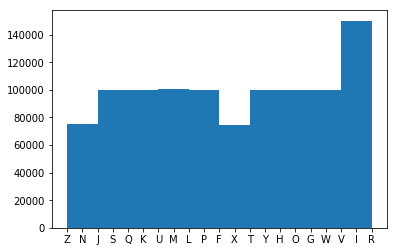

In [189]:
plt.hist([i[0] for i in pid2])
plt.show()

In [8]:
# training에서만 셔플해야함!!
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,bcateid,brand,dcateid,maker,mcateid,model,pid,price,product,scateid,updttm,img_feat
0,11,뭉키데코,31,뭉키월드,10,고급칼라안개시트지,K3856638448,13760,안개컬러시트_베어돌훼미리_별나라여행_90x90cm,345,20180422085142,"[0.24867968, 0.2618123, 0.0, 4.5953097, 0.0, 0..."
1,53,학산문화사,195,,464,학산문화사 (학산문화사) 뽀글아 사랑해 2,O4696389726,-1,학산문화사 (학산문화사) 뽀글아 사랑해 2,2071,20180413054629,"[0.024605619, 0.0408522, 0.020847924, 0.304369..."
2,16,해외업체,-1,해외업체,184,인터파크/해외업체/주방조리기구/조리기구기타,M1955631615,33610,[삼성 5% 청구할인]Super-Kleer K.C.,-1,20180421025342,"[0.0007277946, 0.09078337, 0.0, 0.0, 0.0424287..."
3,14,Ethnotek,-1,에스노텍,141,,K3594798519,-1,[텐바이텐] 가나 24 라자 뜨레드 L_백팩/힙색,209,20170728111116,"[0.57843715, 2.6492686, 0.023014769, 0.0, 0.97..."
4,2,미미월드,-1,미미월드 / 미미월드,66,미미 뽀로로 컴퓨터 (71010) / 미미 뽀로로 컴퓨터 (71010),R4674862926,86740,미미 뽀로로 컴퓨터 (71010) 학습완구 유아동컴퓨터,3108,20180420133920,"[0.018207876, 0.0, 0.0046464545, 0.0, 0.166306..."


In [9]:
# df.to_csv('small_kakao.csv')
# df2 = pd.read_csv('small_kakao.csv', encoding='utf-8')

In [10]:
df.loc[0, 'product'].split(' ')

['에버링', '에버링', '', '14K', '샤인듀', '0.1캐럿', '블루', '다이아몬드', '목걸이']

In [9]:
from collections import Counter
import re

In [13]:
"""# 문장 다루기
aa = list(zip(df['product'], df['model'], df['brand'], df['maker']))[0]

# str.join(' ', aa)
print(aa)
tmp = re.sub(r'[^\w]', ' ', str.join(' ', aa)).split(' ')
tmp = set(filter(None, tmp))
# print(set(tmp))
tmp"""

('[로트리]로사 센티폴리아 파우더 팩트 SPF 40 PA++', '', '로트리', '네이디')


{'40', 'PA', 'SPF', '네이디', '로사', '로트리', '센티폴리아', '파우더', '팩트'}

In [14]:
"""vocab_brand = Counter()
for i in df['model']:
    tmp = re.sub(r'[^\w]', ' ', i)
    vocab_brand.update(tmp.split())    

vocab_brand.most_common(100)"""

In [10]:
# re.sub(r'[^\w]', ' ', df.iloc[0,1])
vocab = Counter()
for i in zip(df['product'], df['model'], df['brand'], df['maker']):
    tmp = re.sub(r'[^\w]', ' ', str.join(' ', i))
    vocab.update(tmp.split())

In [11]:
vocab.most_common(100)

[('기타', 259423),
 ('참조', 78472),
 ('해외', 68266),
 ('상품상세설명', 64356),
 ('인터파크', 59644),
 ('5', 31481),
 ('청구할인', 22200),
 ('주', 21568),
 ('1', 19790),
 ('삼성', 16948),
 ('상세설명참조', 14926),
 ('2', 14305),
 ('케이스', 12748),
 ('3', 12072),
 ('여성', 11484),
 ('바보사랑', 11283),
 ('없음', 10893),
 ('남성', 9690),
 ('블랙', 8582),
 ('for', 8542),
 ('상세페이지', 8267),
 ('세트', 8185),
 ('4', 7968),
 ('0', 7917),
 ('S', 7651),
 ('아트박스', 7558),
 ('6', 7386),
 ('케이블', 7347),
 ('Black', 7183),
 ('아디다스', 6959),
 ('나이키', 6857),
 ('무료배송', 6791),
 ('M', 6669),
 ('KB', 6307),
 ('x', 5936),
 ('LG', 5818),
 ('3M', 5766),
 ('상세정보참조', 5560),
 ('티셔츠', 5533),
 ('후추통', 5453),
 ('HP', 5451),
 ('정품', 5445),
 ('7', 5442),
 ('1EA', 5387),
 ('8', 5369),
 ('LED', 5271),
 ('Mens', 5007),
 ('스마트폰', 4974),
 ('상품', 4969),
 ('화이트', 4961),
 ('하프클럽', 4860),
 ('문구', 4836),
 ('USB', 4812),
 ('토너', 4764),
 ('다이어리', 4762),
 ('10', 4699),
 ('1300K', 4681),
 ('100', 4573),
 ('대', 4542),
 ('and', 4537),
 ('with', 4373),
 ('s', 4350),
 ('가방', 4343

In [12]:
len(vocab)


702200

## for more training with other data chunk

In [6]:
%%time
from collections import Counter
import re

path = './data_org/train.chunk.09'

h = h5py.File(path,'r')
print([i.decode('utf8') for i in h['train']['product'][:10] ])

ht = Reader(path)
df = ht.makeDF(0, 500000, mode="train")

df = df.sample(frac=1).reset_index(drop=True)

# 664848
# 일단 트레이닝 단어 갯수에 맞춰야 모델이 안변함
vocab = np.zeros(664848)
len(vocab) 

['단풍나무 병풍 디자인 벽 시계 인테리어 그림 저소음', '[SB몰]ital. Tasche Damentasche Handtasche Tragetasche Ledertasche Echt Leder T39, Przise Farbe:Schwarz', '세탁기 급수호스 2M 스프레이호스 호수 호스연결 세차', '[행사기간] 롱임팩소켓(롱임팩복스알) 3/4인찌(19mm) 38mm (GENIUS-지니어스) //!!', '070-7591-8289 신도림웨딩홀 칠순화환 근처화원', '[휘슬러] 머그컵(2p)/ 수저세트(2인용) /이지조리도구 - 이지 서빙스푼', '필립스 FS9185 수염정리기', '이야코 동물나라 백곰양초 -38871', '땡큐샵 뉴 스포츠물병 450ml 도매가', '[해외]Scrapbook Customs Themed Paper & Stickers Scrapbook Kit, London City Memories 키트']
Wall time: 4.87 s


# make simple model

In [76]:
import numpy as np
# from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import mmh3

In [8]:
# word to id
seq_len = 30

data_x = []
for i in tqdm(list(zip(df['product'], df['model'], df['brand'], df['maker']))):
    sentence = re.sub(r'[^\w]', ' ', str.join(' ', i)).split(' ')
    sentence = set(filter(None, sentence))
    # hash --> word to id
    word_ids = [mmh3.hash(word, seed=2018)%(len(vocab)+1) for word in sentence][:seq_len]
    word_ids = np.pad(word_ids, (0,seq_len-len(word_ids)), 'constant', constant_values=(0))
    data_x.append(word_ids)
    

A Jupyter Widget

In [21]:
# for image
"""
# set image as X-data
# data_x = np.array(df['img_feat'], dtype=np.float32) 그냥하면 에러나네??

data_x = []
for i in tqdm(range(len(df['img_feat']))):
    try: 
        k = np.array(df['img_feat'][i], dtype=np.float16)
        data_x.append(k)
    except: 
        print(i)
        break

data_x = np.array(data_x, dtype=np.float16)
data_x.shape
"""

A Jupyter Widget

(500000, 2048)

In [12]:
#  merge image + bcate 
# data_x = np.append(data_x, data_b, axis=1)
# data_x = np.append(data_x, data_m, axis=1)
data_x = np.array(data_x, dtype=np.int32)

In [44]:
"""
# 대중소세 따로 나눌 필요가 없어짐
# y-label to one-hot encoding
data_b = list(df['bcateid'])
_tmp = np.zeros([len(data_b), 57])
_tmp[np.arange(len(data_b)), data_b] = 1
data_b = _tmp

data_m = list(df['mcateid'])
_tmp = np.zeros([len(data_m), 552])
_tmp[np.arange(len(data_m)), data_m] = 1
data_m = _tmp



data_y= list(df['scateid'])
output_dim = 3190 # 대분류 57개, 중 552, 소 3190, 세 404

y_tmp = np.zeros([len(data_y), output_dim])
y_tmp[np.arange(len(data_y)), data_y] = 1
data_y = y_tmp
"""

In [10]:
%%time
# y-label to one-hot encoding

data_y=[]
for cate in tqdm(zip(df['bcateid'],df['mcateid'],df['scateid'],df['dcateid'])):
    tmp = str(cate[0])+'>'+str(cate[1])+'>'+str(cate[2])+'>'+str(cate[3])
    data_y.append(y_vocab[tmp])

output_dim = len(y_vocab) # 4215개
y_tmp = np.zeros([len(data_y), output_dim])
y_tmp[np.arange(len(data_y)), data_y] = 1
data_y = y_tmp

print(data_y.shape)

A Jupyter Widget


(134818, 4215)
Wall time: 561 ms


In [13]:
print(data_x.shape, data_y.shape)

(134818, 30) (134818, 4215)


In [190]:
# split data set
test_ratio = 0.1
val_ratio = 0.01
train_ratio = 1-test_ratio-val_ratio

d_len = len(data_x)
train_end = int(d_len*train_ratio)
test_end = int(d_len*(train_ratio+test_ratio))

X_train = data_x[:train_end]
Y_train = data_y[:train_end]

X_test = data_x[train_end:test_end]
Y_test = data_y[train_end:test_end]

X_val = data_x[test_end:]
Y_val = data_y[test_end:]

print(len(X_train), len(X_val), len(X_test))

890000 10000 100000


In [106]:
"""#  메모리 이슈 있음 ... 코드 바꾸기
# split test set 20%
X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=3)

# split validation set 5%
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.01, random_state=3)

print(len(X_train), len(X_val), len(X_test))"""

'#  메모리 이슈 있음 ... 코드 바꾸기\n# split test set 20%\nX_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=3)\n\n# split validation set 5%\nX_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.01, random_state=3)\n\nprint(len(X_train), len(X_val), len(X_test))'

In [107]:
# 피처 데이터, 레이블, 미니배치 갯수, random sampling
import random
def getMiniBatch2(x, y, n):
    if len(x) != len(y):
        print('Feature and label num is not equal.')
        return
    rand_idx = random.sample(list(range(len(x))), n)
    x_ = [x[i] for i in rand_idx]
    y_ = [y[i] for i in rand_idx]
    return np.array(x_), np.array(y_)

In [108]:
getMiniBatch2(X_train, Y_train, 10)

(array([[1.57492399e-01, 1.80067420e-01, 6.25630081e-01, ...,
         2.07299724e-01, 0.00000000e+00, 1.10654092e+00],
        [0.00000000e+00, 1.16828337e-01, 0.00000000e+00, ...,
         4.68938291e-01, 2.25811258e-01, 2.92878181e-01],
        [6.94428027e-01, 3.13865638e+00, 1.17535738e-03, ...,
         8.98816943e-01, 7.51023591e-01, 6.64478123e-01],
        ...,
        [5.11442386e-02, 7.82950044e-01, 0.00000000e+00, ...,
         1.91206884e+00, 7.86608338e-01, 3.10120583e-02],
        [6.78111911e-02, 6.54827729e-02, 3.44287753e-01, ...,
         0.00000000e+00, 0.00000000e+00, 3.66984159e-02],
        [0.00000000e+00, 0.00000000e+00, 1.68698020e-02, ...,
         6.45870566e-01, 1.15615346e-01, 0.00000000e+00]], dtype=float32),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int8))

In [199]:
# make DAG
tf.reset_default_graph()
tf.set_random_seed(2018)

# train Parameters
# seq_len = 35
output_dim = 4215 # 1번 트레이닝셋만

epoch = 80
batch_size = 1024
vocabulary_size = hash_size
embedding_size = 256


Y = tf.placeholder(tf.int16, [None, output_dim], name="label")
lr = tf.placeholder(tf.float32, [], name='learning_rate')
keep_prob = tf.placeholder(tf.float32, [], name="keep_prob")

#  embedding
X = tf.placeholder(tf.int32, [None, seq_len], name="word_tokens") 
word_embeddings = tf.get_variable("word_embeddings",
    [vocabulary_size, embedding_size], initializer=tf.contrib.layers.xavier_initializer())
embedded_word_ids = tf.nn.embedding_lookup(word_embeddings, X) # batch * seq * embeddding

def _sequence_dropout(step_inputs, keep_prob):
        # apply dropout to each input
        # input : a list of input tensor which shape is [None, input_dim]
        with tf.name_scope('sequence_dropout') as scope:
            step_outputs = []
            for t, _input in enumerate(step_inputs):
                step_outputs.append( tf.nn.dropout(_input, keep_prob) )
        return step_outputs

embedded_word_ids = tf.unstack(embedded_word_ids, axis=1)
step_inputs = _sequence_dropout(embedded_word_ids, keep_prob) # seq * batch * embedding

#  FCN layer
doc_mean = tf.reduce_mean(step_inputs, axis=0) # batch * embedding (mean)
Y_pred = tf.contrib.layers.fully_connected(doc_mean, output_dim, activation_fn=None)  # We use the last cell's output
# hint = tf.placeholder(tf.float32, [None, 609], name='hint') # previous category
# bf_lenear = tf.concat([doc_mean, hint], axis=1) # batch * (embediing + hint)
# bf_lenear = tf.nn.dropout(bf_lenear, keep_prob)

"""# image feature
X = tf.placeholder(tf.float32, [None, len(data_x[0])], name="img_feat")
X = tf.nn.dropout(X, keep_prob)
bf_linear = tf.contrib.layers.fully_connected(X, 1024,
                                           activation_fn=tf.nn.elu, weights_initializer=tf.contrib.layers.xavier_initializer())  # We use the last cell's output
bf_linear = tf.nn.dropout(bf_linear, keep_prob)
Y_pred = tf.contrib.layers.fully_connected(bf_linear, output_dim, activation_fn=None)  # We use the last cell's output
"""
# optimize
cost =tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=Y_pred, labels=Y, name='cross_entropy'))
optimizer = tf.train.AdamOptimizer(lr)
train_step = optimizer.minimize(cost)

# prediction
predicted = tf.argmax(Y_pred, 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, tf.argmax(Y, 1)), dtype=tf.float32))

# saver
name_to_var_map = {var.op.name: var for var in tf.global_variables()}
saver = tf.train.Saver(name_to_var_map, name='my_saver')

In [192]:
# make DAG
tf.reset_default_graph()
tf.set_random_seed(2018)

# train Parameters
# seq_len = 35
output_dim = 4215 # 1번 트레이닝셋만

epoch = 80
batch_size = 1024
# vocabulary_size = len(vocab)
vocabulary_size = hash_size
embedding_size = 512
# embedding_size = 256
features = 200


# =============================================================================

Y = tf.placeholder(tf.int16, [None, output_dim], name="label")
lr = tf.placeholder(tf.float32, [], name='learning_rate')
keep_prob = tf.placeholder(tf.float32, [], name="keep_prob")

#  embedding
X = tf.placeholder(tf.int32, [None, seq_len], name="word_tokens") 
word_embeddings = tf.get_variable("word_embeddings",
    [vocabulary_size, embedding_size], initializer=tf.contrib.layers.xavier_initializer())
embedded_word_ids = tf.nn.embedding_lookup(word_embeddings, X) # batch * seq * embeddding

"""
#  dropout layer
def _sequence_dropout(step_inputs, keep_prob):
        # apply dropout to each input
        # input : a list of input tensor which shape is [None, input_dim]
        with tf.name_scope('sequence_dropout') as scope:
            step_outputs = []
            for t, _input in enumerate(step_inputs):
                step_outputs.append( tf.nn.dropout(_input, keep_prob) )
        return step_outputs

embedded_word_ids = tf.unstack(embedded_word_ids, axis=1)
step_inputs = _sequence_dropout(embedded_word_ids, keep_prob) # seq * batch * embedding

#  FCN layer
doc_mean = tf.reduce_mean(step_inputs, axis=0) # batch * embedding (mean)
# hint = tf.placeholder(tf.float32, [None, 609], name='hint') # previous category
# bf_lenear = tf.concat([doc_mean, hint], axis=1) # batch * (embediing + hint)
# bf_lenear = tf.nn.dropout(bf_lenear, keep_prob)
"""

embedded_word_ids = tf.reshape(embedded_word_ids, [-1, seq_len, embedding_size, 1])
# CNN layer
# kernel size 3
F1 = tf.get_variable('3gram-filter', [3, embedding_size, 1, features], 
                     initializer=tf.contrib.layers.xavier_initializer()) # (row, column, channel, kernels)
L1 = tf.nn.conv2d(embedded_word_ids, F1, strides=[1, 1, 1, 1], padding='VALID')
L1 = tf.nn.tanh(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, seq_len-2, 1, 1],
                    strides=[1, 1, 1, 1], padding='VALID')

# kernel size 4
F2 = tf.get_variable('4gram-filter', [4, embedding_size, 1, features], 
                     initializer=tf.contrib.layers.xavier_initializer()) # (row, column, channel, kernels)
L2 = tf.nn.conv2d(embedded_word_ids, F2, strides=[1, 1, 1, 1], padding='VALID')
L2 = tf.nn.tanh(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, seq_len-3, 1, 1],
                    strides=[1, 1, 1, 1], padding='VALID')

# kernel size 5
F3 = tf.get_variable('5gram-filter', [5, embedding_size, 1, features], 
                     initializer=tf.contrib.layers.xavier_initializer()) # (row, column, channel, kernels)
L3 = tf.nn.conv2d(embedded_word_ids, F3, strides=[1, 1, 1, 1], padding='VALID')
L3 = tf.nn.tanh(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, seq_len-4, 1, 1],
                    strides=[1, 1, 1, 1], padding='VALID')

L_flat = tf.concat([L1, L2, L3], 3) # (?, 1, 1, features*3)
L_flat = tf.reshape(L_flat, [-1, 3 * features]) # (?, features*3)

# 오캄의 면도날... 굳이 없어도 되는 레이어인듯
# L_linear = tf.contrib.layers.fully_connected(L_flat, 512, activation_fn=tf.nn.relu)
# L_linear = tf.nn.dropout(L_linear, keep_prob)
L_linear = tf.nn.dropout(L_flat, keep_prob)


# Y_pred = tf.contrib.layers.fully_connected(bf_lenear, output_dim, activation_fn=tf.nn.relu)  # We use the last cell's output
Y_pred = tf.contrib.layers.fully_connected(L_linear, output_dim, activation_fn=None)  # We use the last cell's output

# # image feature
# X = tf.placeholder(tf.float32, [None, len(data_x[0])], name="img_feat")
# X = tf.nn.dropout(X, keep_prob)
# Y_pred = tf.contrib.layers.fully_connected(X, output_dim,
#                                            activation_fn=tf.nn.relu, weights_initializer=tf.contrib.layers.xavier_initializer())  # We use the last cell's output

# optimize
cost =tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=Y_pred, labels=Y, name='cross_entropy'))
optimizer = tf.train.AdamOptimizer(lr)
train_step = optimizer.minimize(cost)

# prediction
predicted = tf.argmax(Y_pred, 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, tf.argmax(Y, 1)), dtype=tf.float32))

# saver
name_to_var_map = {var.op.name: var for var in tf.global_variables()}
saver = tf.train.Saver(name_to_var_map, name='my_saver')

# train/save

In [200]:
%%time 

if 'sess' in globals(): sess.close()
sess = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True))
sess.run(tf.global_variables_initializer())

x_range=[]
train_accuracies=[]
val_accuracies=[]
val_costs=[]
ckpt_path = './img-model/img-model'
lr_start = 0.002
iter_per_epoch = int(len(data_y)/batch_size)

print('total iter is %d * %d' %(epoch, iter_per_epoch))
for e in range(epoch):
    print('********** %d epoch started: lr-%g **********'%(e, lr_start))
    for i in range(iter_per_epoch):
        X_, Y_ = getMiniBatch2(X_train, Y_train, batch_size) # 랜덤 미니배치 할당
        train_step.run(feed_dict={X:X_, Y:Y_, lr:lr_start, keep_prob:0.5})

    #   아래에 결과 프린트용
        if i % 100 == 0:   
            train_accuracy = accuracy.eval(feed_dict={X:X_, Y:Y_, lr:lr_start, keep_prob:0.5})
            val_accuracy, val_cost = sess.run([accuracy, cost], feed_dict={X:X_val, Y:Y_val, keep_prob:1})

            if lr_start>0.0001:
                lr_start = lr_start*0.999 # lr annealing
            
            train_accuracies.append(train_accuracy)
            val_accuracies.append(val_accuracy)
            val_costs.append(val_cost)
            x_range.append(i+ iter_per_epoch*e)
            print('step %d: acc_tr %g, acc_val %g, cost_val %g' % (i, train_accuracy, val_accuracy, val_cost))
        
    saver.save(sess, ckpt_path, global_step=i+ iter_per_epoch*e)

total iter is 80 * 976
********** 0 epoch started: lr-0.002 **********
step 0: acc_tr 0.00585938, acc_val 0.0022, cost_val 8.33714
step 100: acc_tr 0.00488281, acc_val 0.0094, cost_val 7.13085
step 200: acc_tr 0.00976562, acc_val 0.0089, cost_val 7.12785
step 300: acc_tr 0.0117188, acc_val 0.0095, cost_val 7.11848
step 400: acc_tr 0.0126953, acc_val 0.0101, cost_val 7.11715
step 500: acc_tr 0.0126953, acc_val 0.0088, cost_val 7.11489
step 600: acc_tr 0.00878906, acc_val 0.01, cost_val 7.11008
step 700: acc_tr 0.00683594, acc_val 0.0099, cost_val 7.10424
step 800: acc_tr 0.00976562, acc_val 0.0108, cost_val 7.10575
step 900: acc_tr 0.0078125, acc_val 0.0109, cost_val 7.10432
********** 1 epoch started: lr-0.00198009 **********
step 0: acc_tr 0.0175781, acc_val 0.0112, cost_val 7.1023
step 100: acc_tr 0.0136719, acc_val 0.0106, cost_val 7.10399
step 200: acc_tr 0.0126953, acc_val 0.0106, cost_val 7.1049
step 300: acc_tr 0.0078125, acc_val 0.011, cost_val 7.10164
step 400: acc_tr 0.010742

step 300: acc_tr 0.0166016, acc_val 0.0106, cost_val 7.11392
step 400: acc_tr 0.0175781, acc_val 0.0099, cost_val 7.11408
step 500: acc_tr 0.00976562, acc_val 0.0106, cost_val 7.11538
step 600: acc_tr 0.00976562, acc_val 0.0104, cost_val 7.11447
step 700: acc_tr 0.00878906, acc_val 0.0098, cost_val 7.11482
step 800: acc_tr 0.0136719, acc_val 0.0107, cost_val 7.11247
step 900: acc_tr 0.00878906, acc_val 0.0102, cost_val 7.11427
********** 13 epoch started: lr-0.00175608 **********
step 0: acc_tr 0.015625, acc_val 0.01, cost_val 7.1134
step 100: acc_tr 0.00878906, acc_val 0.01, cost_val 7.11289
step 200: acc_tr 0.00585938, acc_val 0.0105, cost_val 7.11341
step 300: acc_tr 0.00976562, acc_val 0.01, cost_val 7.1142
step 400: acc_tr 0.00976562, acc_val 0.01, cost_val 7.11505
step 500: acc_tr 0.0126953, acc_val 0.0107, cost_val 7.11266
step 600: acc_tr 0.00976562, acc_val 0.0109, cost_val 7.11632
step 700: acc_tr 0.00683594, acc_val 0.0104, cost_val 7.11554
step 800: acc_tr 0.0214844, acc_va

KeyboardInterrupt: 

# get accuracy for dev set

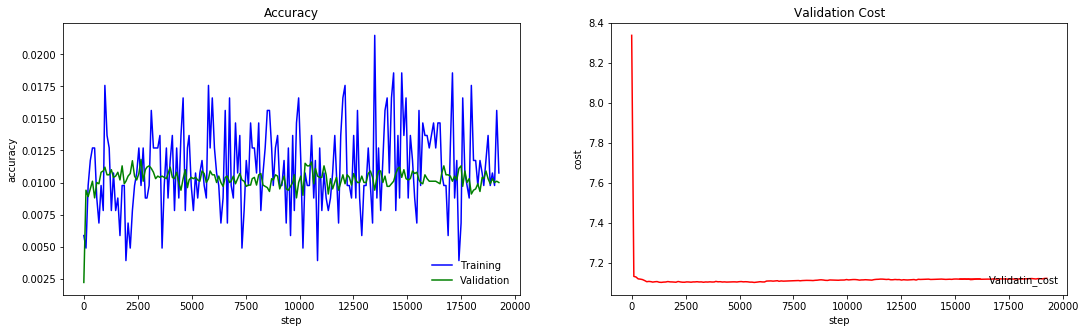

In [201]:
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.plot(x_range, train_accuracies,'-b', label='Training')
plt.plot(x_range, val_accuracies,'-g', label='Validation')
plt.legend(loc='lower right', frameon=False)
# plt.ylim(ymax = 1.1, ymin = 0.7)
plt.ylabel('accuracy')
plt.xlabel('step')
plt.title('Accuracy')

plt.subplot(122)
plt.plot(x_range, val_costs,'-r', label='Validatin_cost')
plt.legend(loc='lower right', frameon=False)
# plt.ylim(ymax = 1.1, ymin = 0.7)
plt.ylabel('cost')
plt.xlabel('step')
plt.title('Validation Cost')
plt.show()

# Inference

In [22]:
# restore model
if 'sess' in globals(): sess.close()
sess = tf.InteractiveSession()

ckpt_path = './small_model/small'
saver.restore(sess, ckpt_path+'-785')

INFO:tensorflow:Restoring parameters from ./small_model/small-785


In [112]:
from math import ceil

# 여기서도 OOM 날수 있다
acc_tot = []
cost_tot = []
cate_predicted = []
chunk_size = 10000 # OOM 방지
iter_num = ceil(len(Y_test)/chunk_size)

for i in range(iter_num):
    test_accuracy, test_cost, tokens = \
        sess.run([accuracy, cost, predicted], feed_dict={X:X_test[chunk_size*i:chunk_size*(i+1)], Y:Y_test[chunk_size*i:chunk_size*(i+1)], keep_prob:1})
    acc_tot.append(test_accuracy)
    cost_tot.append(test_cost)
    
    for tok in tokens:
        cate_predicted.append(token_to_cate[tok].split('>'))
    print('Test Accuracy: %g \tTest cost: %g' %(test_accuracy, test_cost))
    
print('Total Accuracy:', np.array(acc_tot).mean(), '\tTotal Cost:', np.array(cost_tot).mean())

Test Accuracy: 0.5929 	Test cost: 1.94591
Test Accuracy: 0.6002 	Test cost: 1.90377
Test Accuracy: 0.5952 	Test cost: 1.91526
Test Accuracy: 0.6007 	Test cost: 1.90224
Test Accuracy: 0.5966 	Test cost: 1.88181
Test Accuracy: 0.6059 	Test cost: 1.89267
Test Accuracy: 0.5886 	Test cost: 1.92891
Test Accuracy: 0.5958 	Test cost: 1.95787
Test Accuracy: 0.6025 	Test cost: 1.87426
Test Accuracy: 0.5998 	Test cost: 1.90628
Total Accuracy: 0.59782 	Total Cost: 1.9108998


In [114]:
# 분류 계층별 정확도 보기

# 나누기
cate_ans = []
for i in np.argmax(Y_test, axis=1):
    cate_ans.append(token_to_cate[i].split('>'))


cate_predicted = np.array(cate_predicted)
cate_ans = np.array(cate_ans)

# df_cate = pd.DataFrame(cate_predicted, columns=['bcateid', 'mcateid', 'scateid', 'dcateid'])
# 계산하기
cols=['bcateid', 'mcateid', 'scateid', 'dcateid']
aws_list = cate_ans.transpose([1,0]) == cate_predicted.transpose([1,0])
accs = []

for i, aws in enumerate(aws_list):
    _sum = np.sum(aws)
    acc = _sum/len(aws)
    accs.append(acc)
    print('%s: %g \t %d/%d' %(cols[i], acc, _sum, len(aws)))
    
print('final score:', (accs[0]+accs[1]*1.2+accs[2]*1.3+accs[3]*1.4)/4) 
print('아직 결측치 보정은 안함')

bcateid: 0.8324 	 83240/100000
mcateid: 0.74532 	 74532/100000
scateid: 0.60723 	 60723/100000
dcateid: 0.91989 	 91989/100000
final score: 0.95100725
아직 결측치 보정은 안함


In [62]:
# 결측치 보정
sid = Counter(df['scateid'])
sratio = (len(df['scateid']) - sid.get(-1))/len(df['scateid'])
np.array(acc_tot).mean()/sratio

0.7073726530058878

---
0.002 --> 0.86 어닐링 없이
 - 최고 정확도

### 할일
- 텐서보드 붙이기
- ~~모델 저장하기~~
- ~~이니셜라이저 사용~~
- 4가지 레이블 맞추기
    - 점수 제작 코드
- ~~대분류당 중분류 중복 안되는지~~
    - 패턴먼저 파악하기
    - 중복 안되면 강제로 CRF적용가능
    - 중복 안됨
- 모듈화
    - myUtils.py 에 정리하기
    
---
데이터가 1,2와 3이 많이 다르네
 - 훈련 지속할 파이프라인 구축이 우선
    
    